DSC550<br>
1/21/2021<br>
Michael Hotaling

# 8.2 Exercise

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Step 1:  Load the data from the “train.csv” file into a DataFrame.


In [2]:
data = pd.read_csv("train.csv")

### Step 2:	Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with.)


In [3]:
print("There are {} rows and {} columns in this dataframe".format(data.shape[0], data.shape[1]))

There are 891 rows and 12 columns in this dataframe


###  Step 3: Display the first 5 rows of data so you can see the column headings and the type of data for each column.

- Notice that Survived is represented as a 1 or 0
- Notice that missing data is represented as “NaN”
- The Survived variable will be the “target” and the other variables will be the “features”


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4:	Think about some questions that might help you predict who will survive:
- What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?

| Variable    | Definition                                      | Key                                                                                |
|-------------|-------------------------------------------------|------------------------------------------------------------------------------------|
| PassengerID |                                                 |                                                                                    |
| Survived    | Survival                                        | 0 = No, 1 = Yes                                                                    |
| Pclass      | Ticket class                                    | 1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class                                        |
| Name        | Name of the Passenger                           |                                                                                    |
| Sex         | Sex                                             |                                                                                    |
| Age         | Age in Years                                    | Age is a fractional if less than 1. If age is estimated, it is in the form of xx.5 |
| SibSp       | Number of siblings / spouses aboard the Titanic | brother, sister, stepbrother, stepsister, husband, wife                            |
| Parch       | Number of parents / children aboard the Titanic | mother, father, daughter, son, stepdaughter, stepson                               |
| Ticket      | Ticket Number                                   |                                                                                    |
| Fare        | Passenger Fare                                  |                                                                                    |
| Cabin       | Cabin Number                                    |                                                                                    |
| Embarked    | Port of Embarkation                             | C = Cherbourg, Q = Queenstown, S = Southampton                                     |                                       |


- Are the numerical variables correlated?

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_data = data.select_dtypes(include=['int64', 'float64'])
numerical_data.corr().style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Not really. The strongest correlations are with Pclass and Fare, which makes sense since upper class tickets will be more money. Age is also correlated with Pclass and SibSp since many families were travelling together and larger families tended to be poorer


- Are the distributions of numerical variables the same or different among survived and not survived? Is the survival rate different for different values? For example, were people more likely to survive if they were younger?

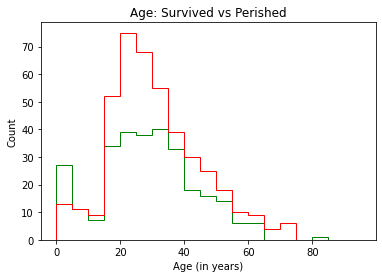

In [6]:
survived_df = data[data['Survived'] == 1]
died_df = data[data['Survived'] == 0]

plt.hist(survived_df['Age'], bins = np.arange(0,100,5), color = "green", histtype = "step")
plt.hist(died_df['Age'], bins = np.arange(0,100,5), color = "red", histtype = "step")
plt.title('Age: Survived vs Perished')
plt.xlabel("Age (in years)")
plt.ylabel("Count")
plt.show()

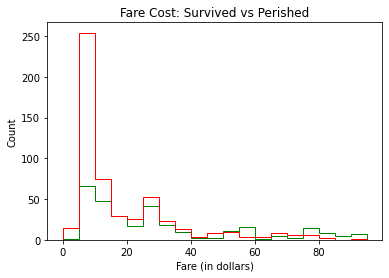

In [7]:
survived_df = data[data['Survived'] == 1]
died_df = data[data['Survived'] == 0]

plt.hist(survived_df['Fare'], bins = np.arange(0,100,5), color = "green", histtype = "step")
plt.hist(died_df['Fare'], bins = np.arange(0,100,5), color = "red", histtype = "step")
plt.title('Fare Cost: Survived vs Perished')
plt.xlabel("Fare (in dollars)")
plt.ylabel("Count")
plt.show()

It's hard to draw conclusions based on the graphs alone, but age or fare doesn't seem to be a large factor whether someone were to survive or not. Class on the other hand is a strong factor. If someone was in 3rd Class, they were much more likely to perish

- Are there different survival rates in different categories? For example, did more women survived than man?

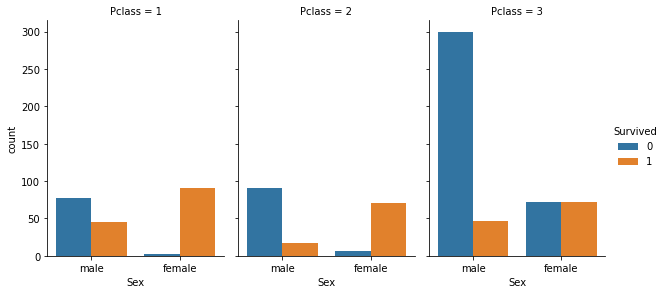

In [8]:
sns.catplot(x="Sex", hue="Survived", col="Pclass",
                data=data, kind="count",
                height=4, aspect=.7);

We have a strong visual correlation between survivability vs sex as well as surivivability and class. Men were much more likely to perish compared to women and men in third class were very likely to perish

### Step 5: Look at summary information about your data (total, mean, min, max, freq, unique, etc.)  Does this present any more questions for you?  Does it lead you to a conclusion yet?  

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dodge, Master. Washington",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


No conclusions yet. We can see that most of our tickets were purchased for under \\$30, but we have a strange outlier at \\$512. We also have 3 unique embarking locations in our data. 

### Step 6: Make some histograms of your data (“A picture is worth a thousand words!”)
-	Most of the passengers are around 20 to 30 years old and don't have siblings or relatives with them. A large amount of the tickets sold were less than \\$50. There are very few tickets sold where the fare was over \\$500.


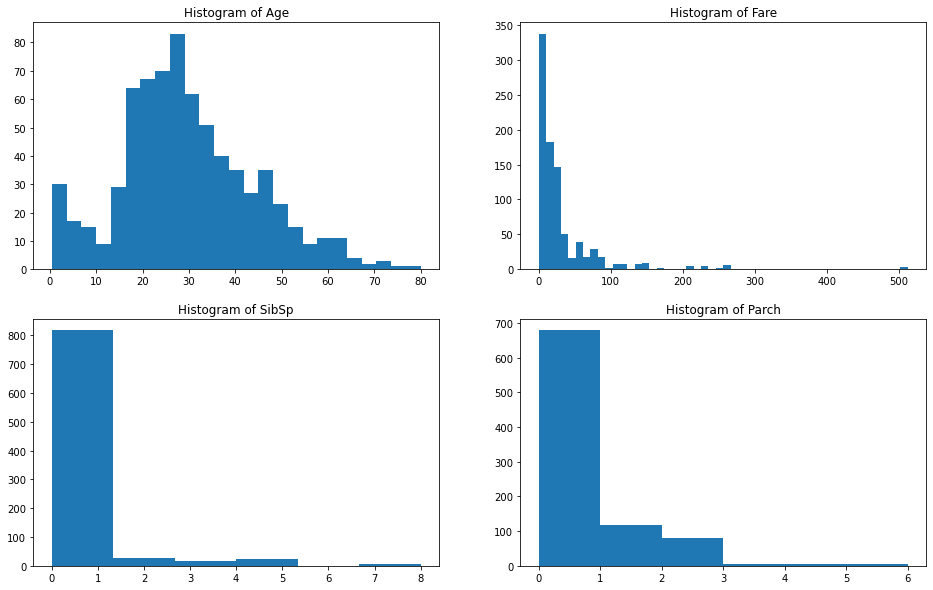

In [11]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(16,10))
ax1.hist(data['Age'], bins = 25)
ax1.title.set_text('Histogram of Age')

ax2.hist(data['Fare'], bins = 50)
ax2.title.set_text('Histogram of Fare')

ax3.hist(data['SibSp'], bins = max(data['Parch']))
ax3.title.set_text('Histogram of SibSp')

ax4.hist(data['Parch'], bins = max(data['Parch']))
ax4.title.set_text('Histogram of Parch')

### Step 7: Make some bar charts for variables with only a few options.
- Ticket and Cabin have more than 100 variables so don’t do those!


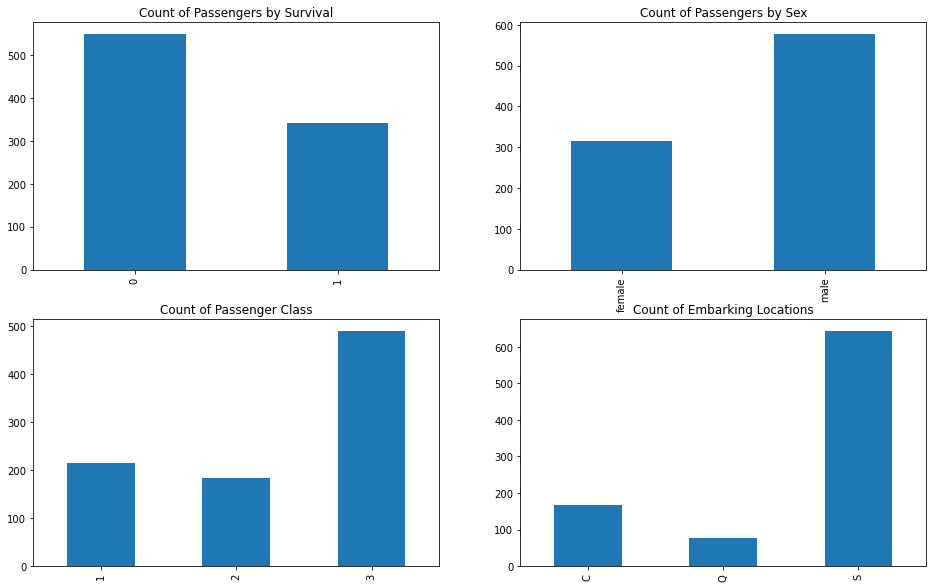

In [12]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(16,10))

data['Survived'].value_counts().sort_index().plot(kind='bar', ax=ax1)
ax1.title.set_text('Count of Passengers by Survival')

data['Sex'].value_counts().sort_index().plot(kind='bar', ax=ax2)
ax2.title.set_text('Count of Passengers by Sex')

data['Pclass'].value_counts().sort_index().plot(kind='bar', ax=ax3)
ax3.title.set_text('Count of Passenger Class')

data['Embarked'].value_counts().sort_index().plot(kind='bar', ax=ax4)
ax4.title.set_text('Count of Embarking Locations')

### Step 8: To see if the data is correlated, make some Pearson Ranking charts
- Notice that in my sample code, I have saved this png file.
- The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)  These results show there is “some” positive correlation but it’s not a high correlation.


In [13]:
# Mild cleaning to ensure we get sex and location in our plot
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

sex_dict = {"male":0,
            "female":1}

def locationator(ser):
    location_dict = {"C":1, 
                     "S":2, 
                     "Q":3}
    if pd.isna(ser):
        return np.nan
    else:
        return location_dict[ser]

selected_data = data.drop(['PassengerId', 'Name', 'Ticket' , 'Cabin'], axis = 1)

selected_data['Sex'] = selected_data['Sex'].apply(lambda x: sex_dict[x])
selected_data['Embarked'] = selected_data['Embarked'].apply(locationator)
selected_data

transformed = scaler.fit_transform(selected_data)
transformed_pd = pd.DataFrame(transformed)
transformed_pd.columns= selected_data.columns

transformed_pd

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,0.0,0.271174,0.125,0.000000,0.014151,0.5
1,1.0,0.0,1.0,0.472229,0.125,0.000000,0.139136,0.0
2,1.0,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.5
3,1.0,0.0,1.0,0.434531,0.125,0.000000,0.103644,0.5
4,0.0,1.0,0.0,0.434531,0.000,0.000000,0.015713,0.5
...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.0,0.334004,0.000,0.000000,0.025374,0.5
887,1.0,0.0,1.0,0.233476,0.000,0.000000,0.058556,0.5
888,0.0,1.0,1.0,NaN,0.125,0.333333,0.045771,0.5
889,1.0,0.0,0.0,0.321438,0.000,0.000000,0.058556,0.0


In [14]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])
transformed_pd.corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.126753
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.307324
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.023175
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.042340
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.031095
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.035756
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.269588
Embarked,-0.126753,0.307324,-0.023175,-0.042340,0.031095,-0.035756,-0.269588,1.000000


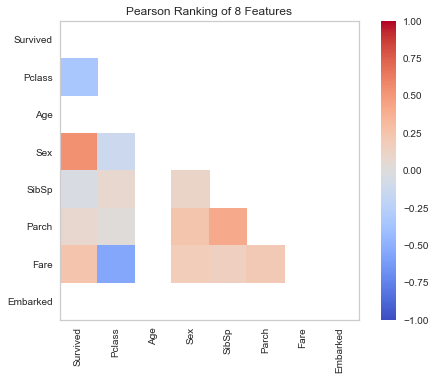

In [15]:
# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

num_features = ['Survived','Pclass','Age','Sex', 'SibSp', 'Parch', 'Fare','Embarked']
# extract the numpy arrays from the data frame
X = transformed_pd[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson', colormap = "coolwarm")
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the data
plt.show()


### Step 9: Use Parallel Coordinates visualization to compare the distributions of numerical variables between passengers that survived and those that did not survive.
- That’s a cool chart, isn’t it?!  Passengers traveling with siblings on the boat have a higher death rate and passengers who paid a higher fare had a higher survival rate


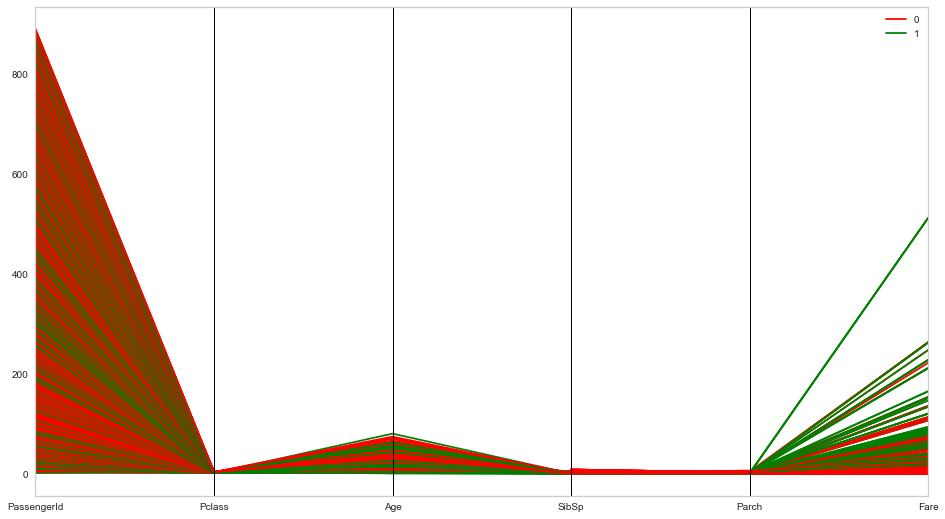

In [16]:
plt.figure(figsize=(16,9))
pd.plotting.parallel_coordinates(numerical_data, 'Survived', color = ["red","green"]);

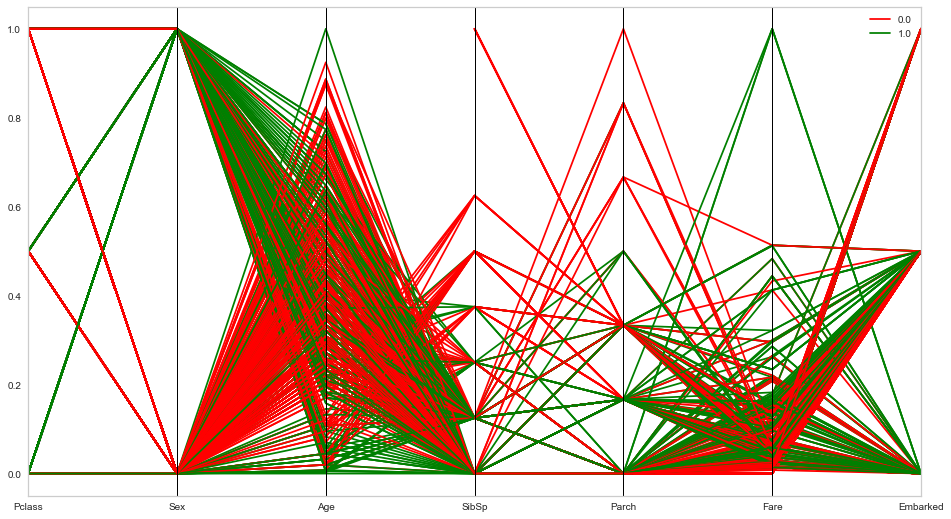

In [17]:
plt.figure(figsize=(16,9))
pd.plotting.parallel_coordinates(transformed_pd, 'Survived', color = ['red', 'green']);

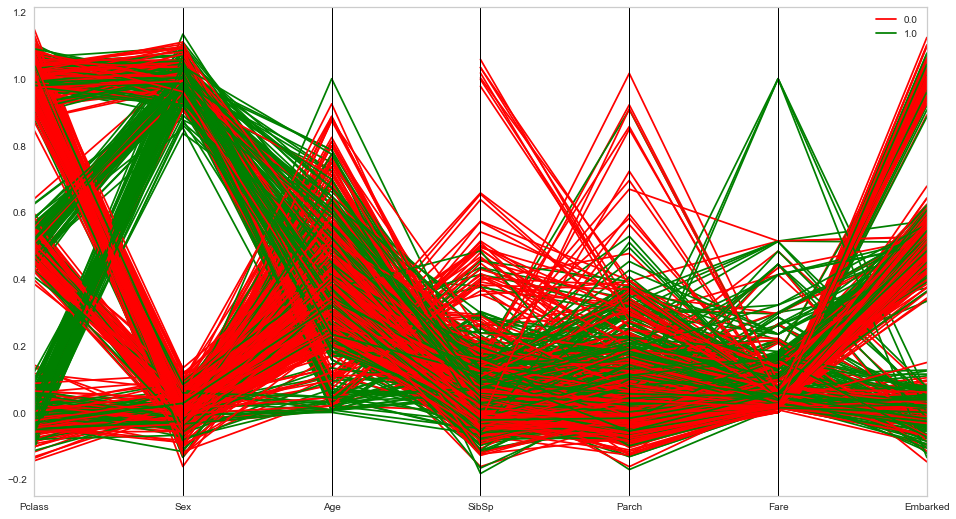

In [18]:
# Adding some jitter to the data to make it easier to see trends. 

def rand_jitter(array):
    '''This is a function I made for 530 that adds jitter to make plots easier to visualize'''
    stdev = .05 * (max(array) - min(array))
    return array + (np.random.randn(len(array)) * stdev)

for i in transformed_pd.columns:
    if i in ['Pclass', 'Sex', "SibSp", 'Parch','Embarked']:
        transformed_pd[i] = rand_jitter(transformed_pd[i])

plt.figure(figsize=(16,9))
pd.plotting.parallel_coordinates(transformed_pd, 'Survived', color = ['red', 'green']);

### Step 10: Use Stack Bar Charts to compare passengers who survived to passengers who didn’t survive based on the other variables.

- More females survived than men.  3rd Class Tickets had a lower survival rate.  
- Embarkation from Southampton port had a lower survival rate.


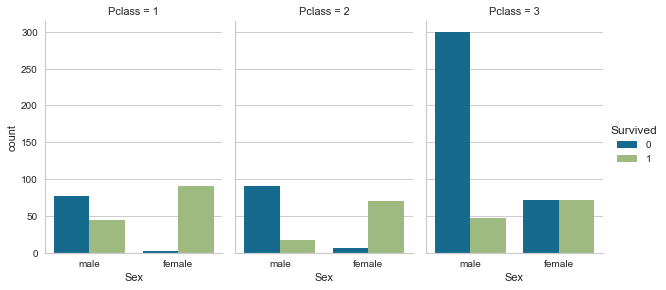

In [19]:
# I can't for the life of me figure out how to stack these bars.
# Hope this is okay. I have stacked bar plots below these

sns.catplot(x="Sex", hue="Survived", col="Pclass",
                data=data, kind="count",
                height=4, aspect=.7, );

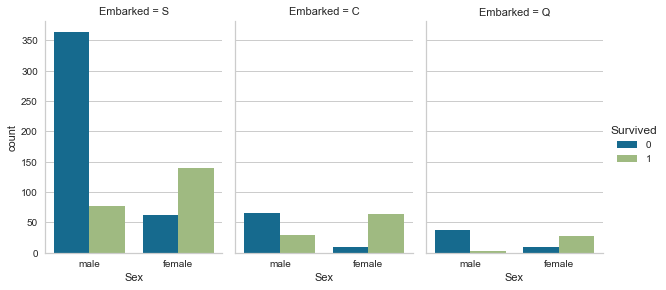

In [20]:
sns.catplot(x="Sex", hue="Survived", col="Embarked",
                data=data, kind="count",
                height=4, aspect=.7, );

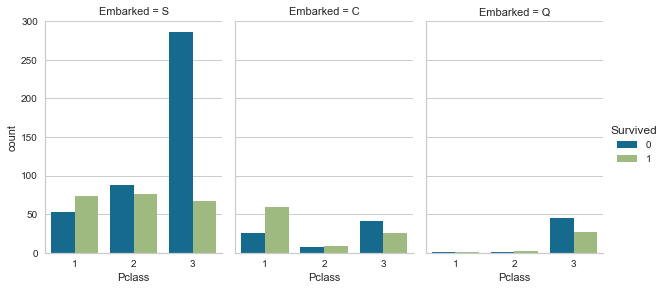

In [21]:
sns.catplot(x="Pclass", hue="Survived", col="Embarked",
                data=data, kind="count",
                height=4, aspect=.7, );

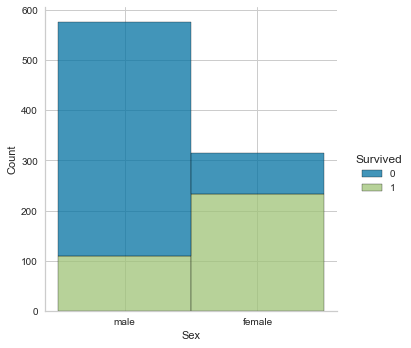

In [22]:
sns.displot(data, x='Sex', hue='Survived', multiple='stack');

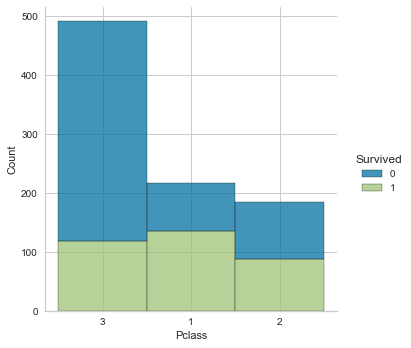

In [23]:
data['Pclass'] = data['Pclass'].apply(str)
sns.displot(data, x='Pclass', hue='Survived', multiple='stack');

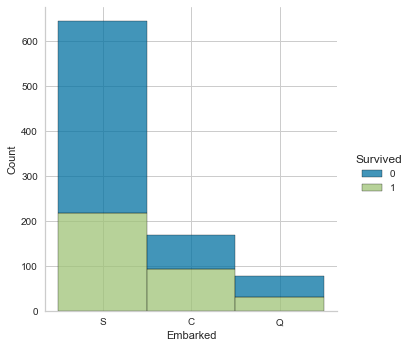

In [24]:
sns.displot(data[data['Embarked'].notnull()], x='Embarked', hue='Survived', multiple='stack');

### Step 11: Some of my questions have been answered by seeing the charts but in some ways, looking at this much data has created even more questions.  

- Now it’s time to reduce some of the features so we can concentrate on the things that matter!  There features we will get rid of are:  "PassengerId", "Name", "Ticket" and "Cabin".  (ID doesn’t really give us any useful data, Ticket and Cabin have too many variables.  Name might reflect that they are related but we’re keeping the category about siblings (for now).  




In [25]:
data_cleaned = data.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
data_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


- We can also fill in missing values.  (Cabin has some missing values but we are dropping that feature.)  Age has some missing values so I’ll fill in with the average age.  Embarked also has some missing so I’ll the most common.  



**Age Imputation**

In [26]:
by_sex_class = data.groupby(['Sex', 'Pclass'])
by_sex_class['Age'].describe()

count       mean        std   min     25%   50%    75%   max
Sex    Pclass                                                              
female 1        85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
       2        74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       3       102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
male   1       101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
       2        99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
       3       253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

In [27]:
def impute_mean(series):
    return series.fillna(series.mean())

data_cleaned['Age'] = by_sex_class['Age'].transform(impute_mean)
data_cleaned.tail()                  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.00,0,0,13.00,S
887,1,1,female,19.00,0,0,30.00,S
888,0,3,female,21.75,1,2,23.45,S
889,1,1,male,26.00,0,0,30.00,C
890,0,3,male,32.00,0,0,7.75,Q


In [28]:
data_cleaned['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [29]:
data_cleaned['Embarked'] = data_cleaned['Embarked'].fillna(data_cleaned['Embarked'].mode()).values
data_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.2500,S
1,1,1,female,38.00,1,0,71.2833,C
2,1,3,female,26.00,0,0,7.9250,S
3,1,1,female,35.00,1,0,53.1000,S
4,0,3,male,35.00,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S
887,1,1,female,19.00,0,0,30.0000,S
888,0,3,female,21.75,1,2,23.4500,S
889,1,1,male,26.00,0,0,30.0000,C


### 12:	If you go back and look at the histograms of Fare, you’ll see that it is very skewed…many low cost fares, not very many high cost fares.  Log Transformation is a good method to use on highly skewed data.  

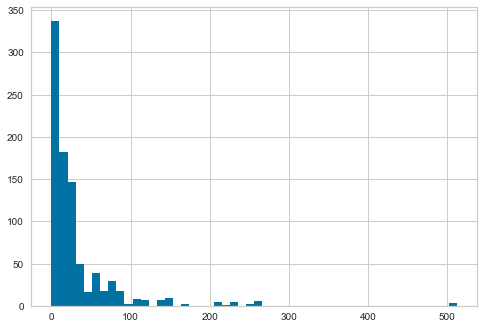

In [30]:
plt.hist(data['Fare'], bins=50)
plt.show()

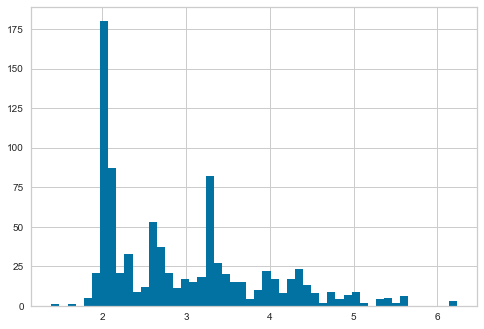

In [31]:
plt.hist(np.log(data_cleaned[data_cleaned['Fare'] != 0]['Fare']), bins=50) # Need to exclude fare = 0 since log10(0) == -inf
plt.show()

In [32]:
#data_cleaned['Fare'] = np.log10(data_cleaned['Fare'])
data_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.2500,S
1,1,1,female,38.00,1,0,71.2833,C
2,1,3,female,26.00,0,0,7.9250,S
3,1,1,female,35.00,1,0,53.1000,S
4,0,3,male,35.00,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S
887,1,1,female,19.00,0,0,30.0000,S
888,0,3,female,21.75,1,2,23.4500,S
889,1,1,male,26.00,0,0,30.0000,C


### 13: Convert your categorical data into numbers (Sex, PClass, Embark)

In [33]:
def locationator(ser):
    location_dict = {"C":1, 
                     "S":2, 
                     "Q":3}
    if pd.isna(ser):
        return np.nan
    else:
        return location_dict[ser]

data_cleaned['Sex'] = data_cleaned['Sex'].apply(lambda x: sex_dict[x])
data_cleaned['Embarked'] = data_cleaned['Embarked'].apply(locationator)

data_cleaned['Pclass'] = pd.to_numeric(data_cleaned['Pclass'])
data_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.00,1,0,7.2500,2.0
1,1,1,1,38.00,1,0,71.2833,1.0
2,1,3,1,26.00,0,0,7.9250,2.0
3,1,1,1,35.00,1,0,53.1000,2.0
4,0,3,0,35.00,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.00,0,0,13.0000,2.0
887,1,1,1,19.00,0,0,30.0000,2.0
888,0,3,1,21.75,1,2,23.4500,2.0
889,1,1,0,26.00,0,0,30.0000,1.0


In [34]:
data_cleaned = data_cleaned.replace(np.nan,0 )
data_cleaned.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

### 14: Training - Split your data into two sets:  Training and Testing.  

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

train, test = train_test_split(data_cleaned)

In [36]:
trainX = train.loc[:, train.columns != 'Survived']
trainY = train['Survived']

In [37]:
testX = test.loc[:, train.columns != 'Survived']
testY = test['Survived']

### 15: Evaluation – Remember, we are trying to predict if a passenger has survived or not so this is a classification problem.  There are many algorithms that could be used but we’re going to use logistic regression.  

In [38]:
# Init the Model
model = LogisticRegression()

In [39]:
# Build the model with the training attributes with the target being the Survived attribute
model.fit(trainX, trainY)

LogisticRegression()

In [40]:
# Using the model to preidct values for the testing dataset
pred = model.predict(testX)

#### Confusion Matrix  (you should get 84% - pretty good)

In [41]:
print("Model Accuracy: {:.2f}%".format(np.mean(testY == pred) * 100))

Model Accuracy: 85.20%


In [42]:
cm = confusion_matrix(testY, pred)
cm

array([[118,  18],
       [ 15,  72]], dtype=int64)

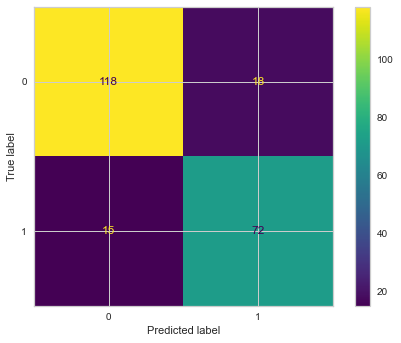

In [43]:
plot_confusion_matrix(model, testX, testY)

#### Precision, Recall & F1 score (all 3 were very good)

In [44]:
from sklearn.metrics import precision_recall_fscore_support

In [45]:
precision, recall, __, support = precision_recall_fscore_support(testY, pred)
print(f"Precision: {precision}\nRecall: {recall}\nSupport: {support}")

Precision: [0.88721805 0.8       ]
Recall: [0.86764706 0.82758621]
Support: [136  87]


#### ROC curve (the dotted line is the randomly guessed so anything above that is good metric)

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(testY, pred)

In [47]:
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.922


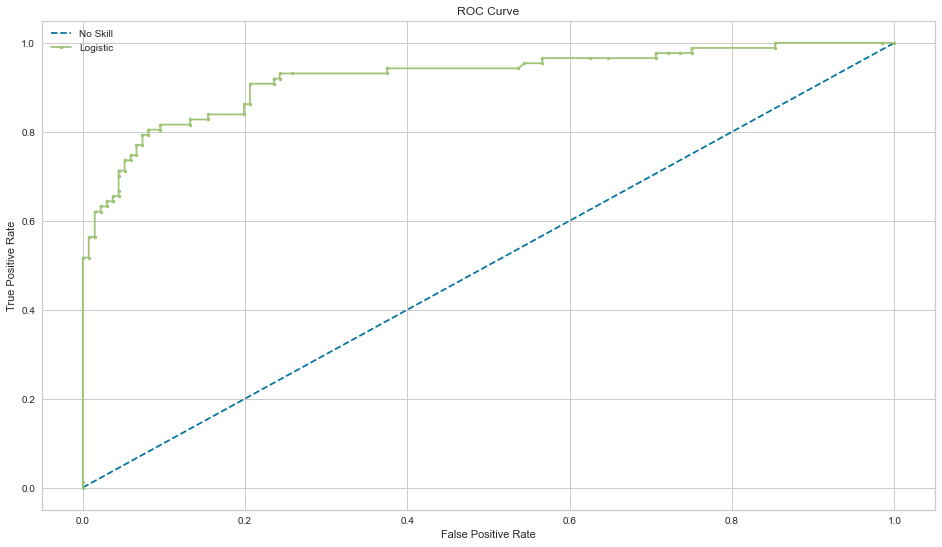

In [48]:
lr_probs = model.predict_proba(testX)

# Creating no-skill classification
ns_probs = [0 for i in range(len(testY))]

# Keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# Calcualting area under curve for no skill and logistic regression
ns_auc = roc_auc_score(testY, ns_probs)
lr_auc = roc_auc_score(testY, lr_probs)

# Score Summary
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Generating the ROC curves for both models
ns_fpr, ns_tpr, _ = roc_curve(testY, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testY, lr_probs)

# Plotting the curve
plt.figure(figsize=(16,9))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()